# Rotation of an image

This client reads an image and sends it to the server to have it rotated.

## Load an image

In [1]:
import cv2
photo = cv2.imread('../photo-1515061942942-2fb5aa4d63c9.jpg')

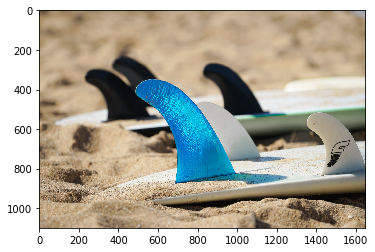

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
_ = plt.imshow(cv2.cvtColor(photo, cv2.COLOR_BGR2RGB))

Thanks to [@mgolsen](https://unsplash.com/@mganeolsen) for making this [photo](https://unsplash.com/photos/wJZ2Uyljhfo) available freely on [@unsplash](https://unsplash.com)

## Serialize

Create the protobuf message

In [7]:
import image_pb2
img = image_pb2.image()

Encode the image into the bytes of the message

In [20]:
r, buf = cv2.imencode(".png", photo)
img.png = buf.tobytes()

## Send to the server

In [21]:
import zmq

try:
    context = zmq.Context()

    #  Socket to talk to server
    print("Connecting to rotate server...")
    with context.socket(zmq.REQ) as socket:
        socket.connect("tcp://localhost:5556")
        print("Sending request ...")
        socket.send(img.SerializeToString())

        #  Get the reply.
        message = socket.recv()
        img.ParseFromString(message)
        print("Received reply")
finally:
    context.term()

Connecting to rotate server...
Sending request ...
Received reply


## Decode and display

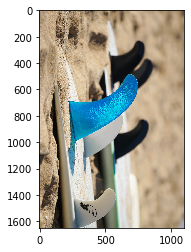

In [22]:
import numpy as np
phot90 = cv2.imdecode(np.frombuffer(img.png,dtype=np.byte),cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(phot90, cv2.COLOR_BGR2RGB))